In [ ]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

In [ ]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-100, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=13
Period for indexes: 1924-04-13 to 2024-04-13 


#Answers
* A1: 2.5
* A2: -1.1
* A3: 82
* A4: 0.42
* A5: 2.8
* A6: free text
* A7: free text


#1) Q1. Average YoY growth rate for GDPC1 for 2023  (data: https://fred.stlouisfed.org/series/GDPC1)
(e.g. YoY_1 = [GDPC1 for 2023-01-01] / [GDPC1 for 2022-01-01] , ...YoY_4 = [GDPC1 for 2023-10-01] / [GDPC1 for 2022-10-01]

In [ ]:
# Q1 Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1).
#  calculate YoY growth rate (in percent, NO % sign) and find the average YoY growth in 2023 (average from 4 YoY numbers).
# calculate growth and truncate to 1 digit after the comma: e.g. if you have 5.66% growth => you should answer  5.6
#  A1: 2.5

In [ ]:
gdpc = pdr.DataReader("GDPC1", "fred", start=start)

In [ ]:
gdpc['gdpc_us_yoy'] = gdpc.GDPC1/gdpc.GDPC1.shift(4)-1


In [ ]:
gdpc.tail()

,GDPC1,gdpc_us_yoy
DATE,,
2022-10-01,21989.981,0.006517
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


In [ ]:
gdpc.index.min()

Timestamp('1947-01-01 00:00:00')

<Axes: xlabel='DATE'>

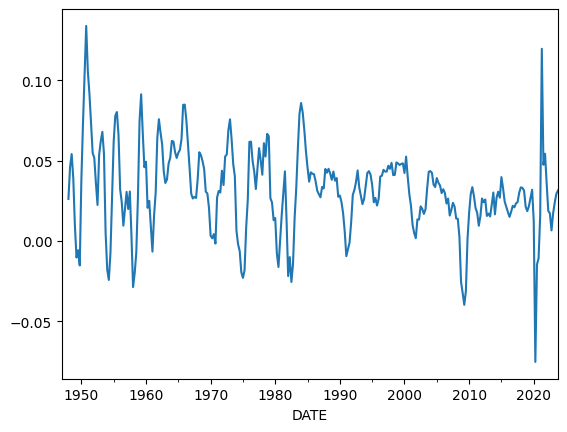

In [ ]:
gdpc.gdpc_us_yoy.plot.line()

In [ ]:
gdpc[gdpc.index>='2023-01-01'].gdpc_us_yoy.mean()

0.02540443392867625

In [ ]:
gdpc.tail(4)

,GDPC1,gdpc_us_yoy
DATE,,
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


In [ ]:
# A1: 2.5
gdpc.tail(4).mean()

GDPC1          22376.906500
gdpc_us_yoy        0.025404
dtype: float64

# Q2. "Treasury Yield": interest rate difference

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2,
 https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

Find the min value of (dgs10-dgs2) after since 2000 (~ last 24 years) and write it down as an answer, round to 1 digit after the decimal point.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)



In [ ]:
#  https://fred.stlouisfed.org/categories/115
# https://fred.stlouisfed.org/series/DGS2
# https://fred.stlouisfed.org/series/DGS10

dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10", "fred", start=start)

In [ ]:
dgs2.tail()

,DGS2
DATE,
2024-04-05,4.73
2024-04-08,4.78
2024-04-09,4.74
2024-04-10,4.97
2024-04-11,4.93


In [ ]:
dgs10.tail()

,DGS10
DATE,
2024-04-05,4.39
2024-04-08,4.42
2024-04-09,4.36
2024-04-10,4.55
2024-04-11,4.56


In [ ]:
joined_df = dgs2.join(dgs10, how='inner', lsuffix='_2yr', rsuffix='_10yr')
joined_df

,DGS2,DGS10
DATE,,
1976-06-01,7.26,7.94
1976-06-02,7.23,7.94
1976-06-03,7.22,7.92
1976-06-04,7.12,7.89
1976-06-07,7.09,7.88
...,...,...
2024-04-05,4.73,4.39
2024-04-08,4.78,4.42
2024-04-09,4.74,4.36


In [ ]:
joined_df['diff'] = joined_df.DGS10 - joined_df.DGS2

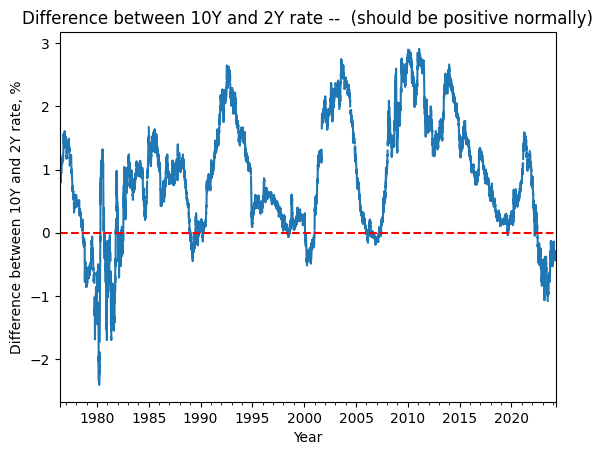

In [ ]:
import matplotlib.pyplot as plt

# Plot the line chart
joined_df['diff'].plot.line()

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')  # Adjust color and linestyle as needed

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Difference between 10Y and 2Y rate, %')
plt.title('Difference between 10Y and 2Y rate --  (should be positive normally)')

# Show plot
plt.show()

In [ ]:
import plotly.express as px

# Assuming joined_df['diff'] is the column you want to plot

# Plot the line chart
fig = px.line(joined_df, y='diff')

# Add horizontal line at y=0
fig.add_hline(y=0, line_dash="dash", line_color="red")

# Update layout
fig.update_layout(title='Line Plot with Horizontal Line at y=0', xaxis_title='X-axis Label', yaxis_title='Y-axis Label')

# Show plot
fig.show()

In [ ]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12488 entries, 1976-06-01 to 2024-04-11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DGS2    11963 non-null  float64
 1   DGS10   11963 non-null  float64
 2   diff    11963 non-null  float64
dtypes: float64(3)
memory usage: 390.2 KB


In [ ]:
joined_df_after_2000 = joined_df[(joined_df.index>='2000-01-01')]
joined_df_after_2000.head(1)

,DGS2,DGS10,diff
DATE,,,
2000-01-03,6.38,6.58,0.2


In [ ]:
joined_df_after_2000['diff'].min()

-1.0800000000000005

In [ ]:
# A2:
round(joined_df_after_2000['diff'].min(),1)

-1.1

In [ ]:
argmin=joined_df_after_2000['diff'].argmin()

In [ ]:
joined_df_after_2000.iloc[argmin]

DGS2     4.94
DGS10    3.86
diff    -1.08
Name: 2023-07-03 00:00:00, dtype: float64

# Q3: Passive rate of return from an index?

* Download two daily index prices for S&P500 (^GSPC) and IPC MEXICO (^MXX). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other top indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [ ]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")
snp500_daily_non_delayed.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000
2024-04-09,5217.029785,5224.810059,5160.779785,5209.910156,5209.910156,3400680000
2024-04-10,5167.879883,5178.430176,5138.700195,5160.640137,5160.640137,3845930000
2024-04-11,5172.950195,5211.779785,5138.770020,5199.060059,5199.060059,3509380000
2024-04-12,5171.509766,5175.029785,5107.939941,5123.410156,5123.410156,3963220000


In [ ]:
snp500_daily_non_delayed.loc['2024-04-09','Adj Close']

5209.91015625

In [ ]:
snp500_daily_non_delayed.loc['2019-04-09','Adj Close']

2878.199951171875

In [ ]:
five_years_snp500_growth = snp500_daily_non_delayed.loc['2024-04-01','Adj Close'] / snp500_daily_non_delayed.loc['2019-04-09','Adj Close']
five_years_snp500_growth

1.8218921925129699

In [ ]:
# https://finance.yahoo.com/quote/%5EGSPC/
# IPC MEXICO (^MXX): Mexico - Mexico Delayed Price. Currency in MXN

mxx_index = yf.download(tickers = "^MXX",
                     period = "max",
                     interval = "1d")
mxx_index.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-08,58021.660156,58192.320312,57749.441406,57989.941406,57989.941406,154641800
2024-04-09,58010.371094,58298.769531,57492.058594,57571.148438,57571.148438,202213300
2024-04-10,57541.859375,57541.859375,56374.628906,56636.539062,56636.539062,210376200
2024-04-11,56696.320312,56876.648438,56485.960938,56830.320312,56830.320312,200968500
2024-04-12,56918.480469,57272.699219,56497.878906,56565.921875,56565.921875,147838800


In [ ]:
mxx_index.loc['2024-04-09','Adj Close']

57571.1484375

In [ ]:
mxx_index.loc['2019-04-09','Adj Close']

45151.62890625

In [ ]:
five_years_mxx_growth = mxx_index.loc['2024-04-09','Adj Close'] / mxx_index.loc['2019-04-09','Adj Close']
five_years_mxx_growth

1.2750624912566744

In [ ]:
# A3: five_years_snp500_growth > five_years_mxx_growth
#   S&P500 had a growth of 82% in 5 years
round((max(five_years_snp500_growth,five_years_mxx_growth)-1)*100)

82

In [ ]:
# CAGR: snp500 grew (+82%) faster than mxx (+27%) in 5 years.
# Average growth (CAGR) of snp500 is 12.7% (~13%) yearly in the last 5 years
five_years_snp500_growth**(1/5)

1.1274688059459677

# Q4 OHLCV : calculate "52-weeks ratio" (2023) for the selected stocks.
Download the 2023 daily OHLCV data for top5 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/):
2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM. Calculate max-min "Adj.Close" price for each stock and divide it on the max "Adj.Close" value.

The highest value up to two numbers in the precision (e.g. 0.157 will be 0.16)

In [ ]:
data = yf.download(tickers = '2222.SR',
                     start='2023-01-01',
                     end='2023-12-31',
                    #  period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,29.227272,29.454544,29.181818,29.454544,28.475794,1569087


In [ ]:
data.tail(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-28,33.150002,33.25,32.950001,33.049999,32.877789,12720450


In [ ]:
tickers = ['2222.SR','BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
res={}

for ticker in tickers:
  data = yf.download(tickers = ticker,
                     start='2023-01-01',
                     end='2023-12-31',
                    #  period = "max",
                     interval = "1d")
  min_value = data['Adj Close'].min()
  max_value = data['Adj Close'].max()
  ratio = (max_value-min_value)	/max_value
  res[ticker]=ratio
  print('')
  print(f'Ticker = {ticker}, min_value={min_value}, max_value ={max_value}, ratio = {ratio}')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Ticker = 2222.SR, min_value=27.245359420776367, max_value =34.66025161743164, ratio = 0.21393070882746015

Ticker = BRK-B, min_value=293.510009765625, max_value =370.4800109863281, ratio = 0.20775750091289963

Ticker = AAPL, min_value=124.16664123535156, max_value =197.85752868652344, ratio = 0.37244419224463476

Ticker = MSFT, min_value=219.9493865966797, max_value =381.9936218261719, ratio = 0.4242066515530231

Ticker = GOOG, min_value=86.7699966430664, max_value =142.82000732421875, ratio = 0.3924520921912013

Ticker = JPM, min_value=120.73725128173828, max_value =168.2747344970703, ratio = 0.28249923173202013


In [ ]:
res

{'2222.SR': 0.21393070882746015,
 'BRK-B': 0.20775750091289963,
 'AAPL': 0.37244419224463476,
 'MSFT': 0.4242066515530231,
 'GOOG': 0.3924520921912013,
 'JPM': 0.28249923173202013}

In [ ]:
# A: 0.42 for MSFT
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
dict(sorted(res.items(),
            key=lambda item: item[1],
            reverse=True))

{'MSFT': 0.4242066515530231,
 'GOOG': 0.3924520921912013,
 'AAPL': 0.37244419224463476,
 'JPM': 0.28249923173202013,
 '2222.SR': 0.21393070882746015,
 'BRK-B': 0.20775750091289963}

# Q5 Div. yield?
Use the same companies to calculate all dividends in 2023 and divide on the latest 'Adj.Close' value in 2023 (for 2023-12-28)

In [ ]:
tickers = ['2222.SR','BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']


In [ ]:
yf_ticker = yf.Ticker('JPM')

In [ ]:
actions_df =  yf_ticker.get_actions()

In [ ]:
actions_df.tail()

,Dividends,Stock Splits
Date,,
2023-04-05 00:00:00-04:00,1.00,0.0
2023-07-05 00:00:00-04:00,1.00,0.0
2023-10-05 00:00:00-04:00,1.05,0.0
2024-01-04 00:00:00-05:00,1.05,0.0
2024-04-04 00:00:00-04:00,1.15,0.0


In [ ]:
div_2023 = actions_df[(actions_df.index>='2023-01-01')&(actions_df.index<='2023-12-31')]
div_2023

,Dividends,Stock Splits
Date,,
2023-01-05 00:00:00-05:00,1.00,0.0
2023-04-05 00:00:00-04:00,1.00,0.0
2023-07-05 00:00:00-04:00,1.00,0.0
2023-10-05 00:00:00-04:00,1.05,0.0


In [ ]:
# all dividends in 2023
div_2023.Dividends.sum()

4.05

In [ ]:
data = yf.download(tickers = 'JPM',
                   start='2023-01-01',
                   end='2023-12-31',
                   interval = "1d")
last_value = data.tail(1)
last_value

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-29,170.0,170.690002,169.630005,170.100006,168.077118,6431800


In [ ]:
div_ratio = div_2023.Dividends.sum()/ last_value.tail(1)['Adj Close']
div_ratio

Date
2023-12-29    0.024096
Name: Adj Close, dtype: float64

In [ ]:
div_res={}

for ticker in tickers:
  actions_df =  yf.Ticker(ticker).get_actions()
  div_2023 = actions_df[(actions_df.index>='2023-01-01')&(actions_df.index<='2023-12-31')]
  data = yf.download(tickers = ticker,
                   start='2023-01-01',
                   end='2023-12-31',
                   interval = "1d")
  last_value = data.tail(1)
  print(f'Last OHLCV data: \n {last_value}')
  dividends_2023_total = div_2023.Dividends.sum()
  div_ratio = dividends_2023_total/ last_value['Adj Close'].values[0]
  div_yield_percent = div_ratio*100
  div_res[ticker] = div_yield_percent
  print(f'Ticker ={ticker}')
  print(f' dividends in 2023 = {dividends_2023_total}, \n last price = {last_value["Adj Close"].values[0]}, \n div yield = {div_yield_percent} %  ')

[*********************100%%**********************]  1 of 1 completed


Last OHLCV data: 
                  Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2023-12-28  33.150002  33.25  32.950001  33.049999  32.877789  12720450
Ticker =2222.SR
 dividends in 2023 = 0.9107640000000001, 
 last price = 32.87778854370117, 
 div yield = 2.770149819503256 %  


[*********************100%%**********************]  1 of 1 completed


Last OHLCV data: 
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-29  357.559998  357.859985  355.309998  356.660004  356.660004   

             Volume  
Date                 
2023-12-29  3269400  
Ticker =BRK-B
 dividends in 2023 = 0.0, 
 last price = 356.6600036621094, 
 div yield = 0.0 %  


[*********************100%%**********************]  1 of 1 completed


Last OHLCV data: 
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   

              Volume  
Date                  
2023-12-29  42628800  
Ticker =AAPL
 dividends in 2023 = 0.95, 
 last price = 192.28463745117188, 
 div yield = 0.4940592304162832 %  


[*********************100%%**********************]  1 of 1 completed


Last OHLCV data: 
              Open        High         Low       Close   Adj Close    Volume
Date                                                                       
2023-12-29  376.0  377.160004  373.480011  376.040009  375.345886  18723000
Ticker =MSFT
 dividends in 2023 = 2.79, 
 last price = 375.34588623046875, 
 div yield = 0.7433143940964608 %  


[*********************100%%**********************]  1 of 1 completed


Last OHLCV data: 
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-29  140.679993  141.434998  139.899994  140.929993  140.929993   

              Volume  
Date                  
2023-12-29  14872700  
Ticker =GOOG
 dividends in 2023 = 0.0, 
 last price = 140.92999267578125, 
 div yield = 0.0 %  


[*********************100%%**********************]  1 of 1 completed

Last OHLCV data: 
              Open        High         Low       Close   Adj Close   Volume
Date                                                                      
2023-12-29  170.0  170.690002  169.630005  170.100006  168.077118  6431800
Ticker =JPM
 dividends in 2023 = 4.05, 
 last price = 168.07711791992188, 
 div yield = 2.409608190645897 %  


In [ ]:
# A5: 2.77 for 2222.SR
div_res

{'2222.SR': 2.770149819503256,
 'BRK-B': 0.0,
 'AAPL': 0.4940592304162832,
 'MSFT': 0.7433143940964608,
 'GOOG': 0.0,
 'JPM': 2.409608190645897}

# (Q6. Free Text) Explore any additional time series (few metrics) that might be valuable for your project and write down why (briefly).

## (Q7. Free Text) Explore earning dates for the whole month - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08). Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.  